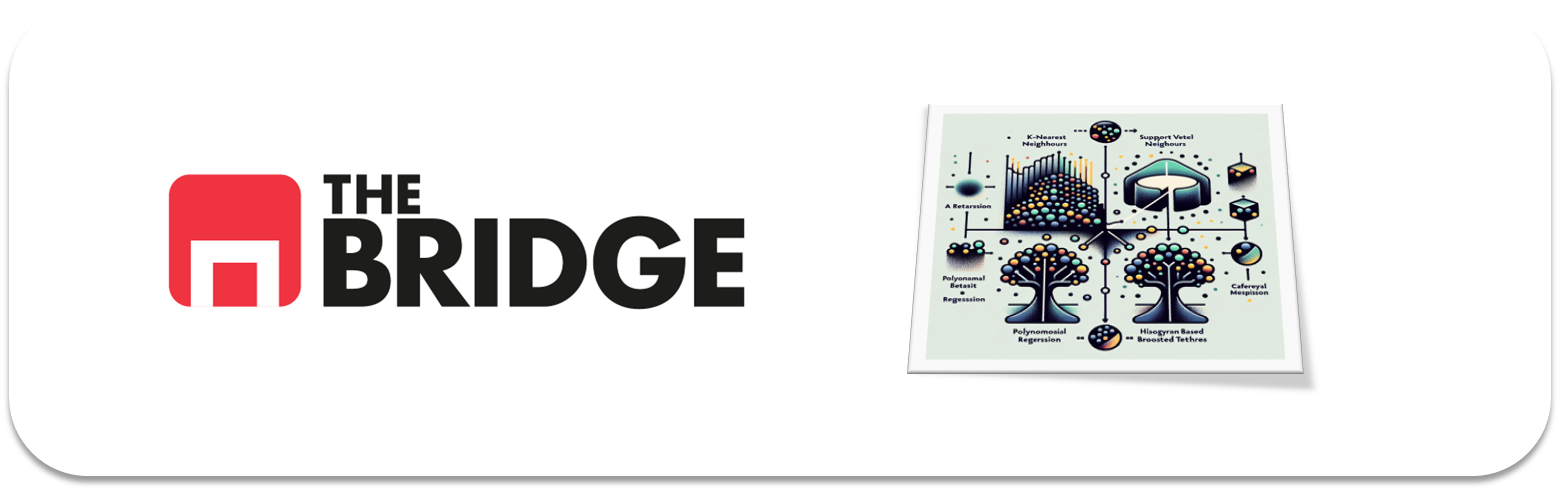

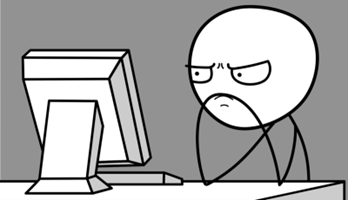

Para hacer un **repaso a los problemas de clasificacion con ML**, completa los siguientes ejercicios. Recuerda que necesitar√°s datos que est√°n en el directorio data que acompa√±a al notebook (b√∫scalo en el repositorio de ejercicios)
  
La soluci√≥n a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### INTRODUCCI√≥N: PROCESO DE ML

En los siguientes ejercicios vamos a seguir (de nuevo) los pasos b√°sicos en la creaci√≥n de un modelo de ML para resolver un problema de predicci√≥n a partir de un dataset que incluye el target, es decir, un aprendizaje supervisado.

En concreto, vamos a trabajar sobre un problema de clasificaci√≥n a trav√©s de los siguientes pasos:

1. Entendimiento del problema (selecci√≥n de la m√©trica m√°s adecuada)  
2. Obtenci√≥n de datos y primer contacto  
3. Train y Test  
4. MiniEDA: An√°lisis del target, an√°lisis bivariante, entendimiento de las features, selecci√≥n de las mismas (si es necesario)  
5. Preparaci√≥n del dataset de Train: Conversi√≥n de categ√≥ricas, tratamiento de num√©ricas  
6. Selecci√≥n e instanciaci√≥n de modelos. Baseline.
7. Comparaci√≥n de modelos (lo haremos por comparaci√≥n con validaci√≥n, puedes hacerlo por comparaci√≥n de modelos de hiperpar√°metros optimizados, si as√≠ lo prefieres)  
8. Selecci√≥n de modelo: Optimizaci√≥n de hiperpar√°metros (ten en cuenta la nota de 7)  
9. Equilibrado del train set  
10. Evaluaci√≥n contra test.  
11. An√°lisis de errores, posibles acciones futuras.  
12. EXTRA: Persistencia del modelo en disco.  

### El problema

La unidad oncol√≥gica del hospital de Madison, Wisconsin, est√° trabajando en un tratamiento muy prometedor sobre el c√°ncer de mama. Desgraciadamente es un tratamiento con efectos secundarios y todav√≠a excesivamente caro, pero cuya efectividad es extraordinaria si se aplica en las primeras etpas o incluso antes de haberlo desarrollado. 

En este sentido, la univeridad quiere disponer de un modelo que le permita detectar potenciales pacientes pero con un alto nivel de acierto en detectar quien puede tener c√°ncer para no aplicar el tratamiento a personas que no fueran a desarrollarlo y por tanto no s√≥lo perder dinero, sino tambi√©n, y m√°s importante causar problemas a esas personas. 

Nos piden trabajar sobre datos que ya tienen, y que pueden obtener facilmente de cualquier futuro aspirante a las pruebas y ensayos con el tratamiento, de pacientes que desarrollaron y no el c√°ncer. Sobre ese dataset quieren que les proporcionemos el mejor modelo de predicci√≥n de qui√©n desarrollar√° o no el c√°ncer y que cumpla con las expectativas del p√°rrafo anterior.

### Ejercicio 0

Importa los paquetes y m√≥dulos que necesites a lo largo del notebook

In [36]:
# Librerias base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias Bootcamp (Data Science - The Bridge Oct24')
import bootcampviztools as bvt
import toolbox_ML as tml

# Semilla 42 para garantizar que los datos se mantengan
np.random.seed(42)

# Modelos de ML de clasificaci√≥n a utilizar en el notebook
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Herramientas de sklearn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

### Ejercicio 1: Entendiendo el problema de "Negocio"

En funci√≥n de la descripci√≥n del problema de "negocio" y sin mirar todav√≠a los datos, ¬øqu√© tipo de problema de clasificaci√≥n vamos a resolver? ¬øQu√© m√©tricas creess m√°s conveniente para medir el rendimiento del modelo a construir y, por tanto, para comparar posibles modelos entre s√≠?

- Problema Supervisado de clasificaci√≥n binaria (Se les diagnosticar√° o no cancer de mama)

### Ejercicio 2: Obtenci√≥n y primer "vistazo"

Carga el dataset, muestra sus primeras filas, su descripci√≥n general y determina el tipo de variables que vamos a manejar. Escoge el target y crea una variable `target` y asignal√© el nombre de la columna correspondiente.

In [2]:
df = pd.read_csv("./data/wisconsin_cancer.csv", sep = "|")
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  compactness_se  concavity_se  concave points_se  \
0         0.2419  ...         0.04904       0.05373            0.01587   
1         0.1812  ...         0.01308       0.01860            0.01340   
2         0.2069  ...         0.04006       0.03832            0.02058   
3         0.2597  ...         0.07458       0.05661            0.01867   
4         0.1809  ...         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  
0           184.60      2019.0            0.1622  
1           158.80      1956.0            0.1238  
2           152.50      1709.0            0.1444  
3            98.87       567.7            0.2098  
4           152.20      1575.0            0.1374  

[5 rows x 26 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

In [4]:
tml.describe_df(df)

Column Name Data Type  Null Percentage (%)  Unique Values  \
0                diagnosis    object                  0.0              2   
1              radius_mean   float64                  0.0            456   
2             texture_mean   float64                  0.0            479   
3           perimeter_mean   float64                  0.0            522   
4                area_mean   float64                  0.0            539   
5          smoothness_mean   float64                  0.0            474   
6         compactness_mean   float64                  0.0            537   
7           concavity_mean   float64                  0.0            537   
8      concave points_mean   float64                  0.0            542   
9            symmetry_mean   float64                  0.0            432   
10  fractal_dimension_mean   float64                  0.0            499   
11               radius_se   float64                  0.0            540   
12              texture_se   float64                  0.0            519   
13            perimeter_se   float64                  0.0            533   
14                 area_se   float64                  0.0            528   
15           smoothness_se   float64                  0.0            547   
16          compactness_se   float64                  0.0            541   
17            concavity_se   float64                  0.0            533   
18       concave points_se   float64                  0.0            507   
19             symmetry_se   float64                  0.0            498   
20    fractal_dimension_se   float64                  0.0            545   
21            radius_worst   float64                  0.0            457   
22           texture_worst   float64                  0.0            511   
23         perimeter_worst   float64                  0.0            514   
24              area_worst   float64                  0.0            544   
25        smoothness_worst   float64                  0.0            411   

    Cardinality (%)  
0          0.351494  
1         80.140598  
2         84.182777  
3         91.739895  
4         94.727592  
5         83.304042  
6         94.376098  
7         94.376098  
8         95.254833  
9         75.922671  
10        87.697715  
11        94.903339  
12        91.212654  
13        93.673111  
14        92.794376  
15        96.133568  
16        95.079086  
17        93.673111  
18        89.103691  
19        87.521968  
20        95.782074  
21        80.316344  
22        89.806678  
23        90.333919  
24        95.606327  
25        72.231986

In [5]:
tml.tipifica_variables(df,10,15)

nombre_variable      tipo_sugerido
0                diagnosis            Binaria
1              radius_mean  Num√©rica Discreta
2             texture_mean  Num√©rica Discreta
3           perimeter_mean  Num√©rica Discreta
4                area_mean  Num√©rica Discreta
5          smoothness_mean  Num√©rica Discreta
6         compactness_mean  Num√©rica Discreta
7           concavity_mean  Num√©rica Discreta
8      concave points_mean  Num√©rica Discreta
9            symmetry_mean  Num√©rica Discreta
10  fractal_dimension_mean  Num√©rica Discreta
11               radius_se  Num√©rica Discreta
12              texture_se  Num√©rica Discreta
13            perimeter_se  Num√©rica Discreta
14                 area_se  Num√©rica Discreta
15           smoothness_se  Num√©rica Discreta
16          compactness_se  Num√©rica Discreta
17            concavity_se  Num√©rica Discreta
18       concave points_se  Num√©rica Discreta
19             symmetry_se  Num√©rica Discreta
20    fractal_dimension_se  Num√©rica Discreta
21            radius_worst  Num√©rica Discreta
22           texture_worst  Num√©rica Discreta
23         perimeter_worst  Num√©rica Discreta
24              area_worst  Num√©rica Discreta
25        smoothness_worst  Num√©rica Discreta

In [6]:
target = "diagnosis"

In [7]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

NOTA: Para m√°s informaci√≥n sobre el dataset el hospital nos redirige a esta [p√°gina web](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download)

### Ejercicio 3: Split

Haz el split en train y test.

In [8]:
train_set, test_set = train_test_split(df, test_size=0.2)

X_train = train_set.drop(columns=target)
X_test = test_set.drop(columns=target)

y_train = train_set[target]
y_test = test_set[target]

### Ejercicio 4: MiniEDA (I)

Analiza la distribuci√≥n frecuencial de target brevemente.

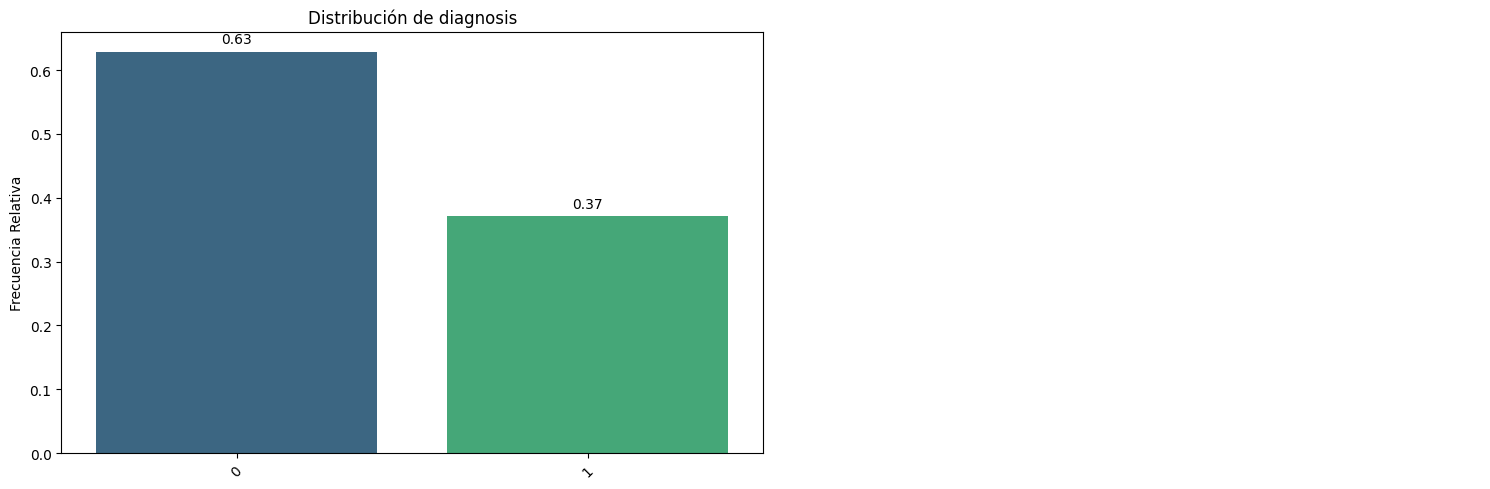

In [9]:
bvt.pinta_distribucion_categoricas(train_set, [target], relativa=True, mostrar_valores=True)

### Ejercicio 5: MiniEDA (II)

Analiza bivariantemente las variables contra el target, de forma que veamos las distintas distribuciones para cada clase (puedes emplear la liber√≠a gr√°fica que crees conveniente)

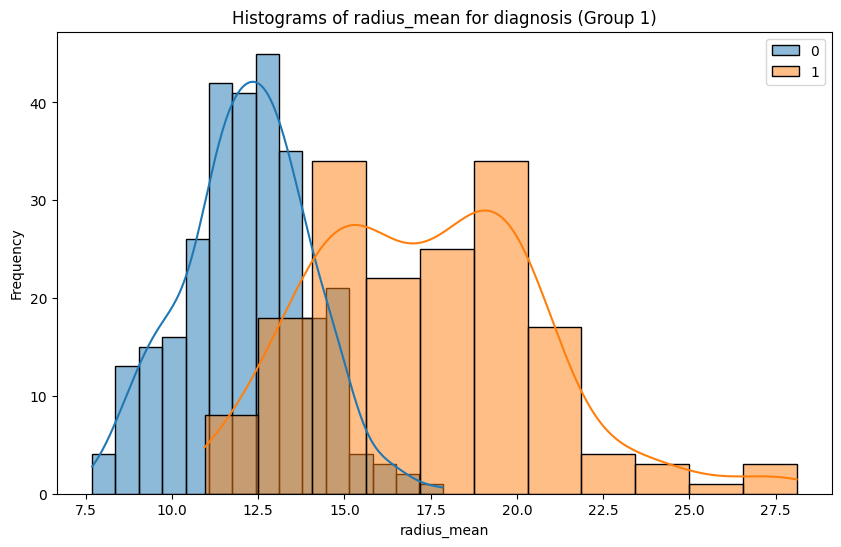

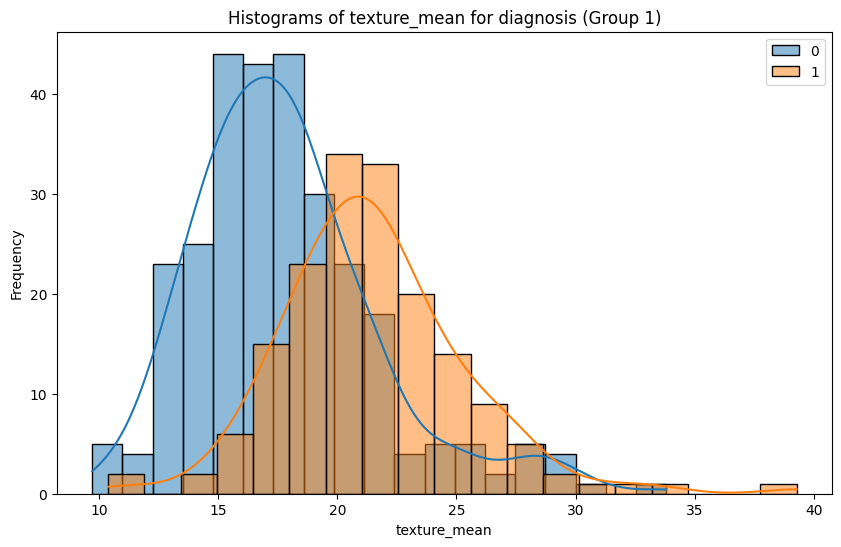

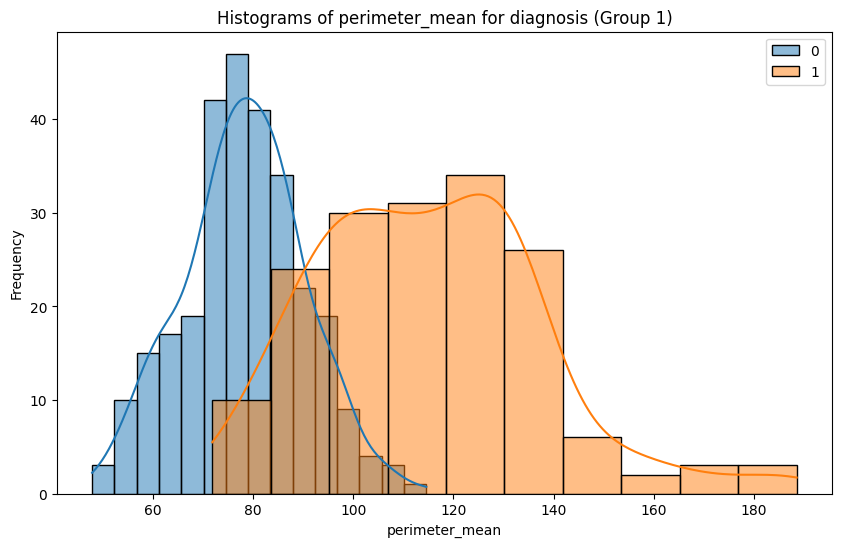

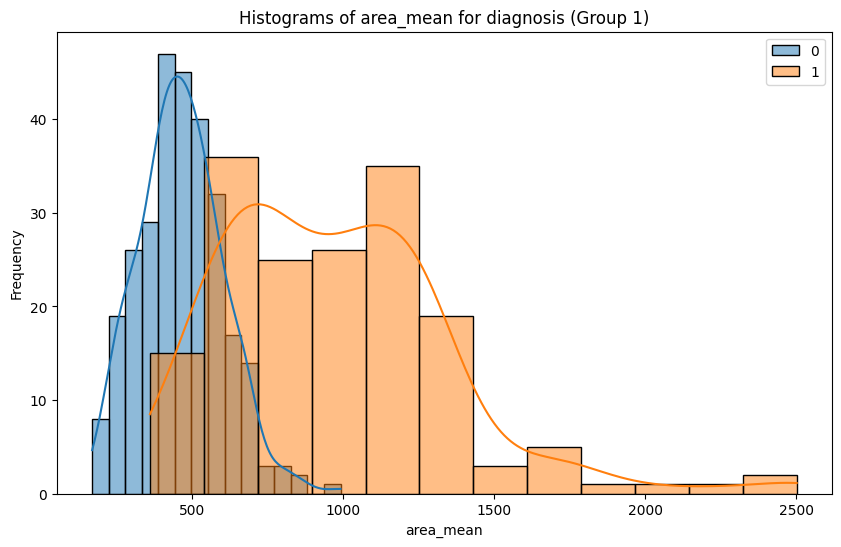

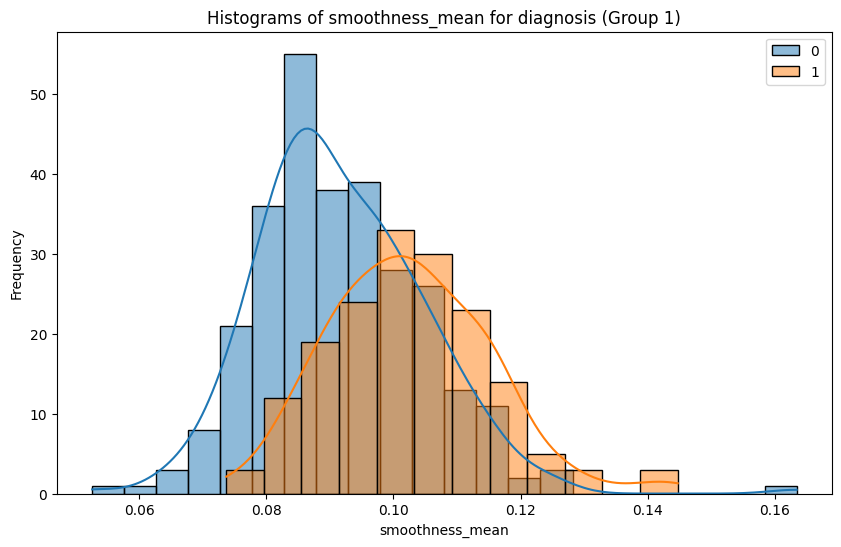

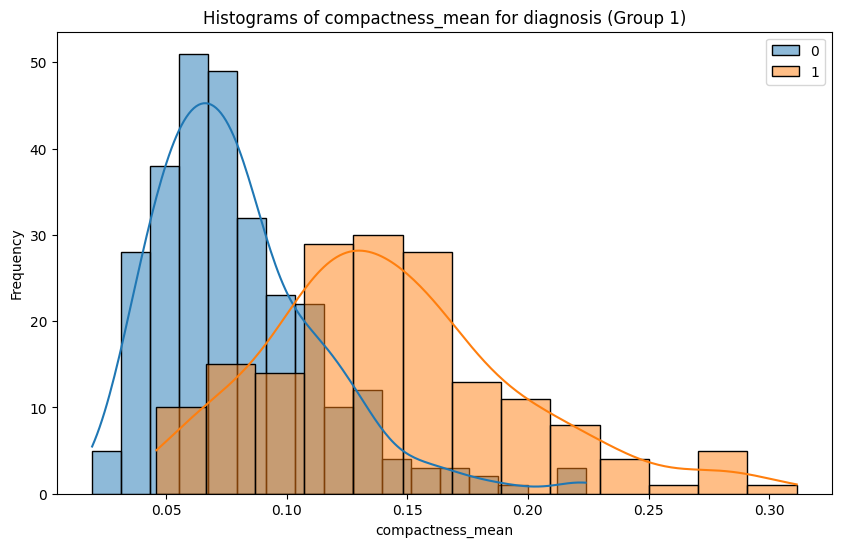

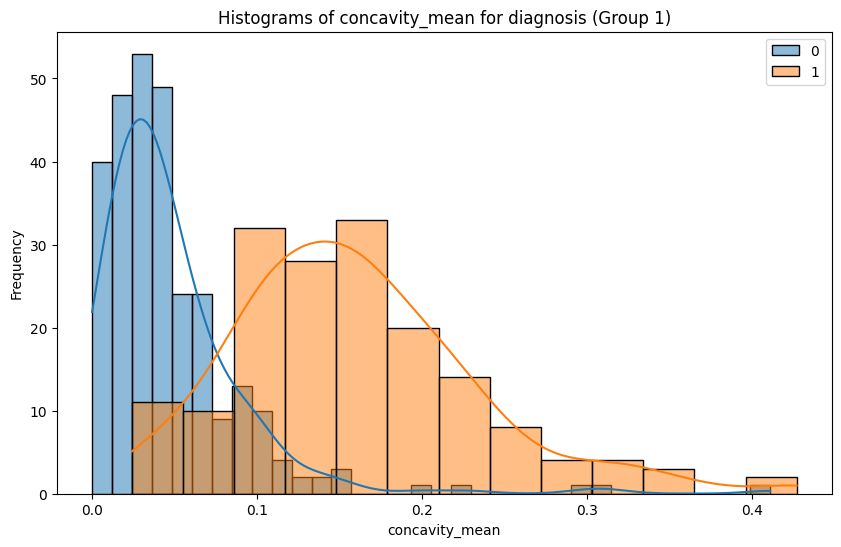

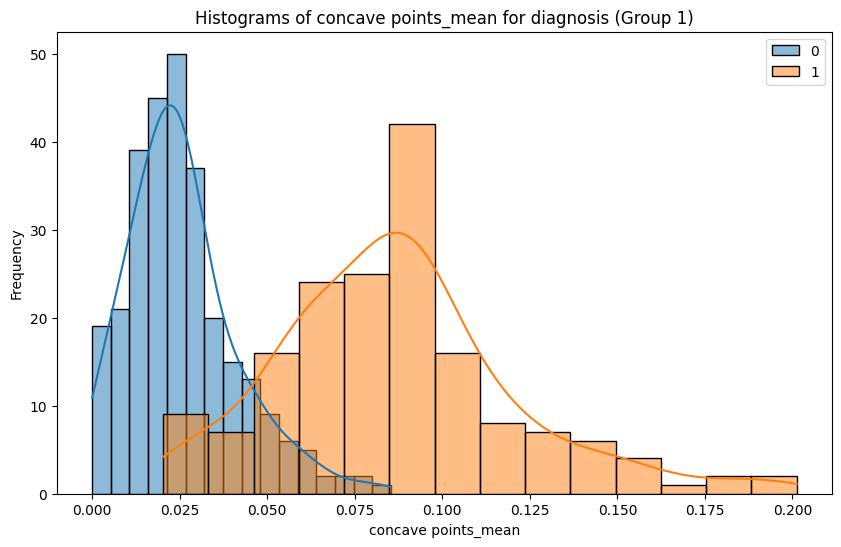

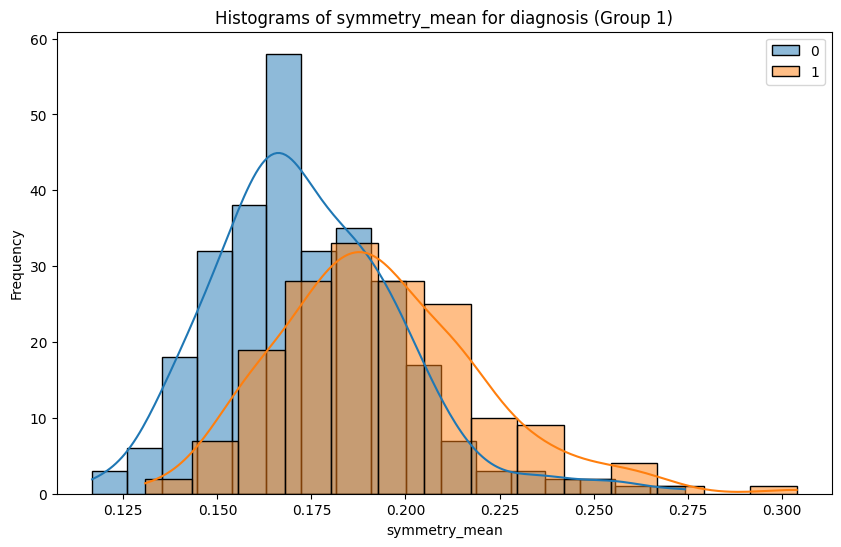

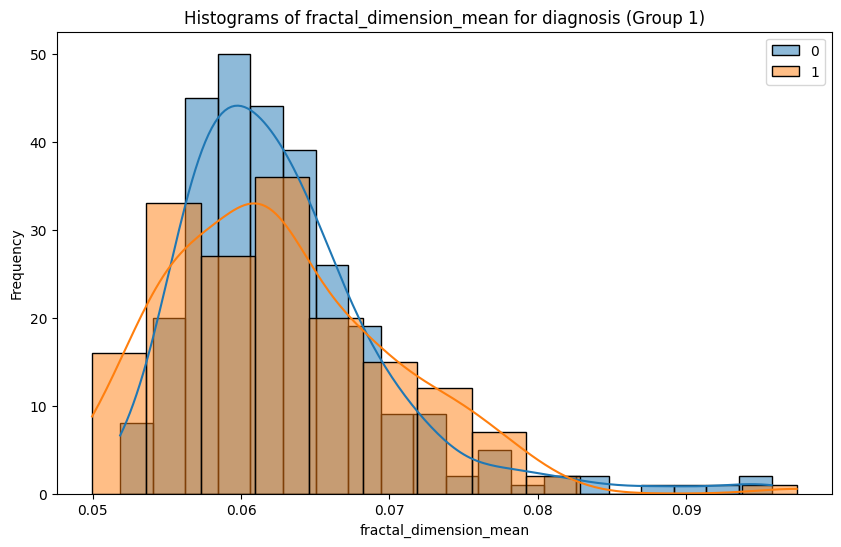

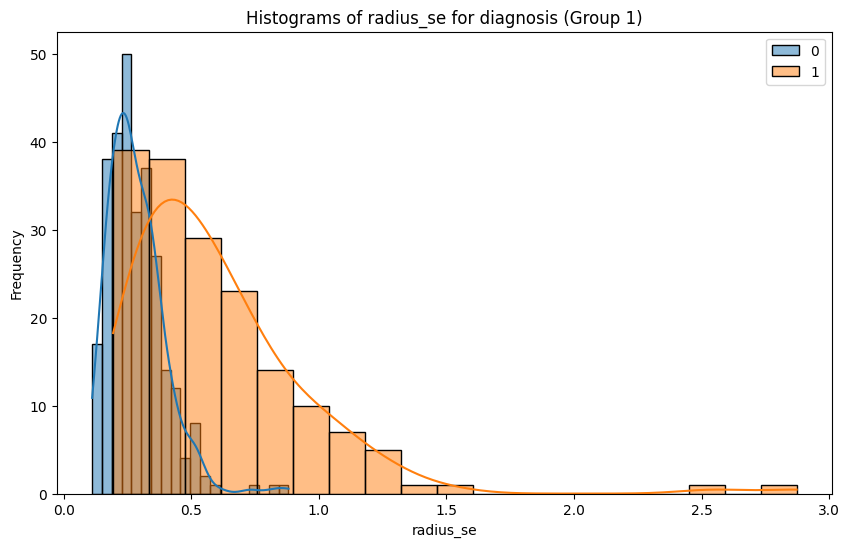

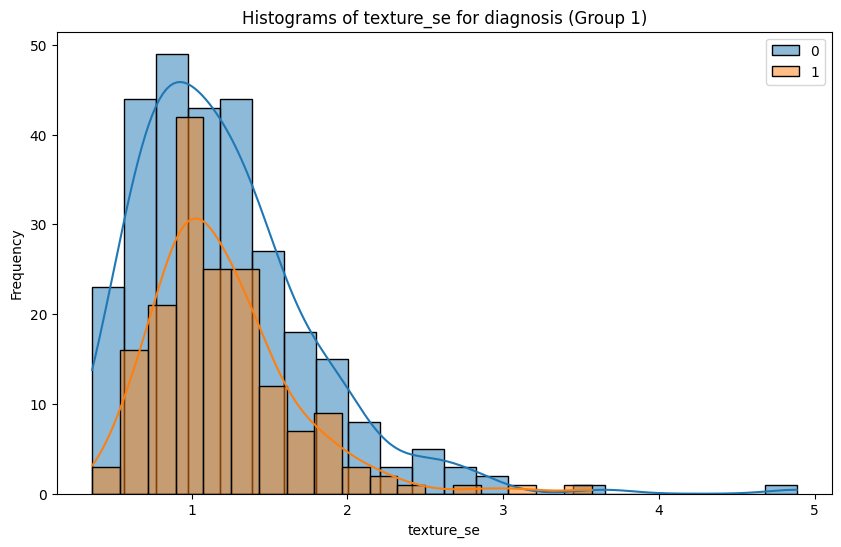

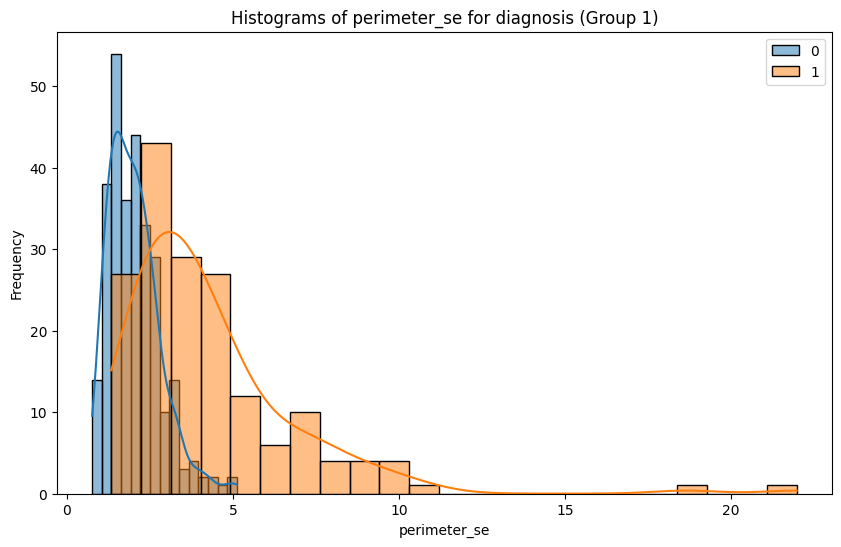

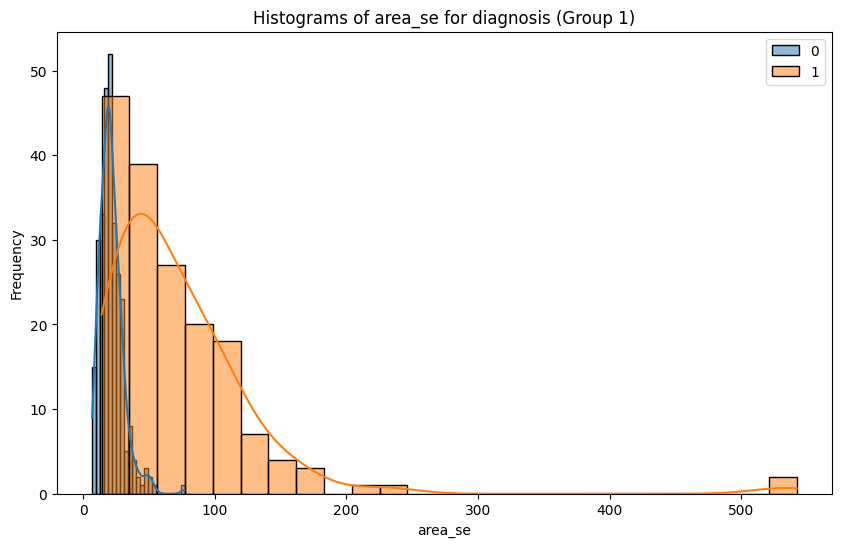

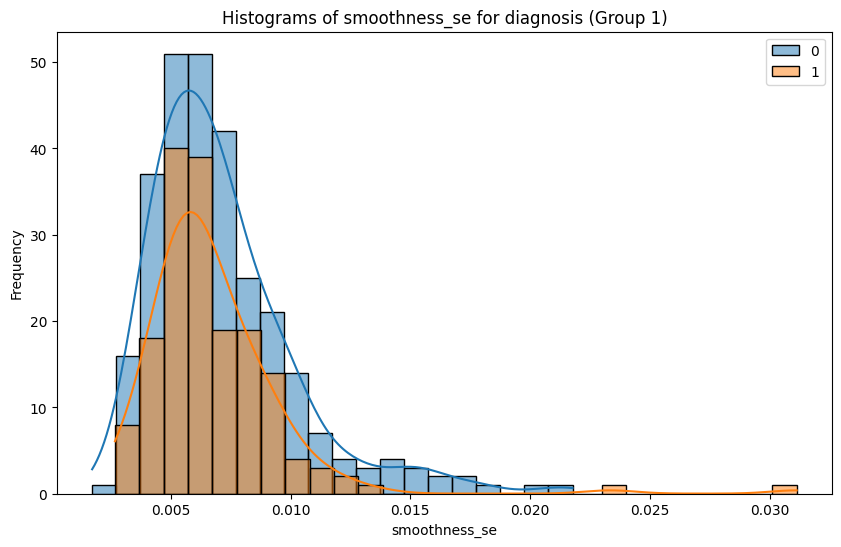

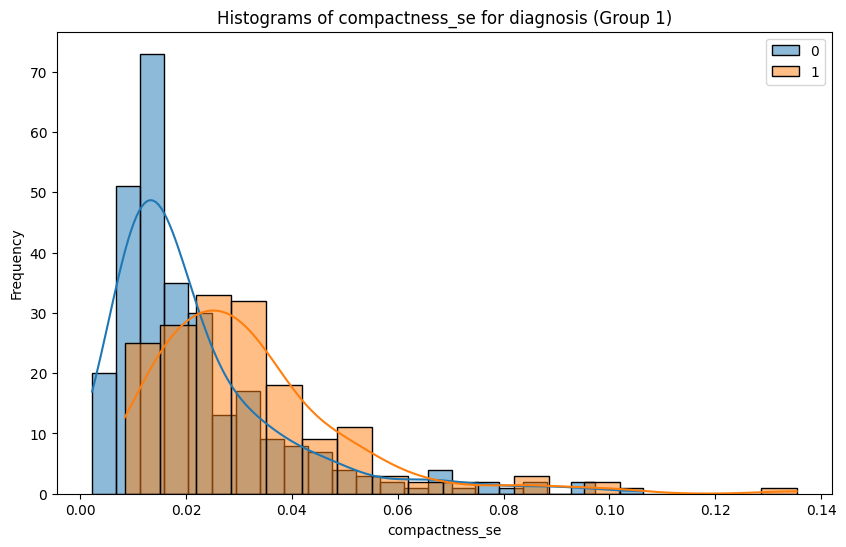

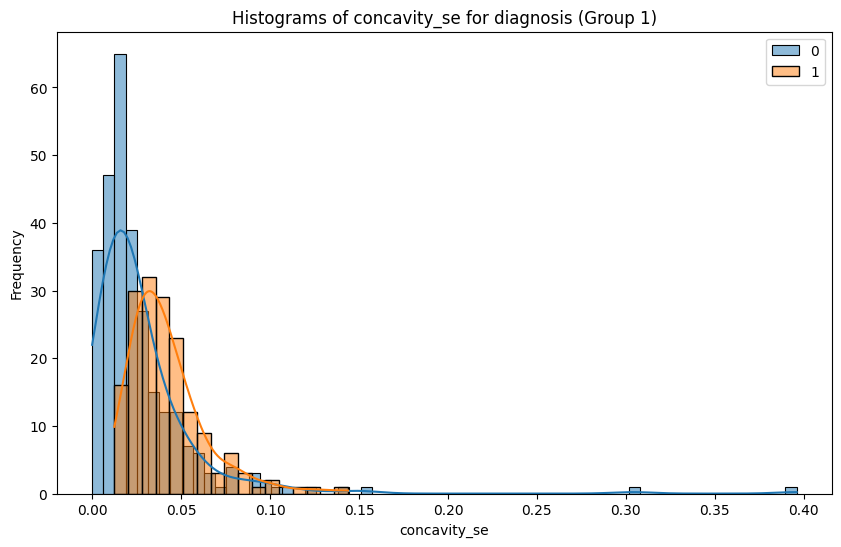

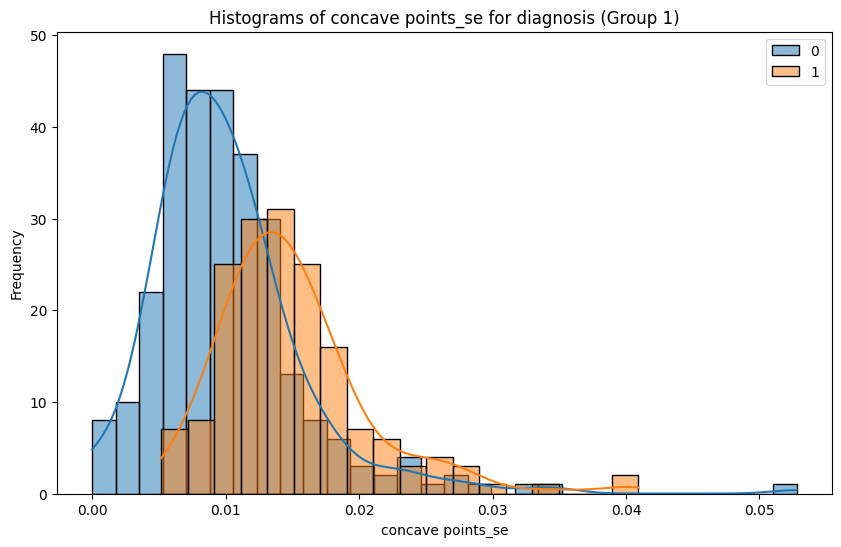

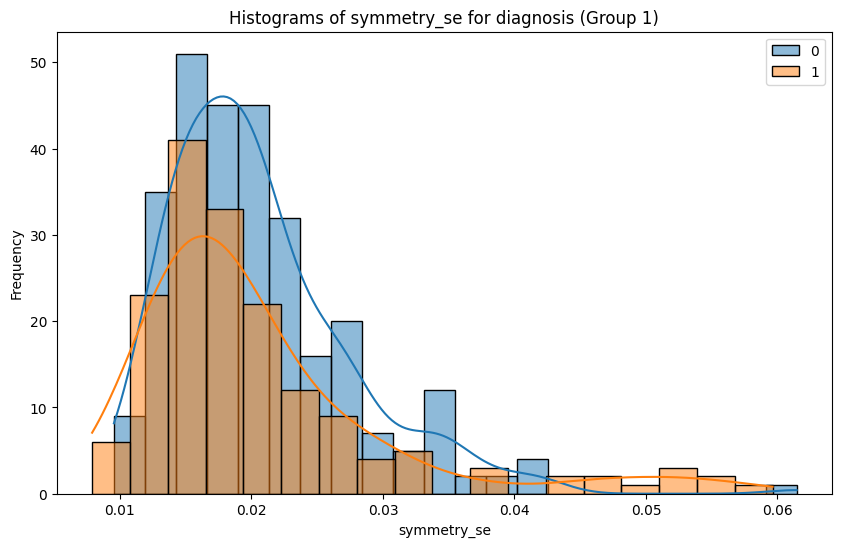

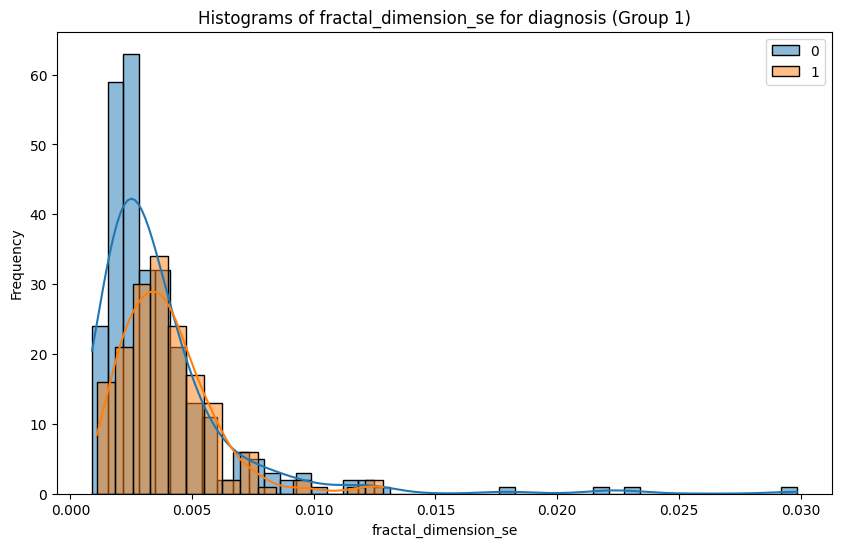

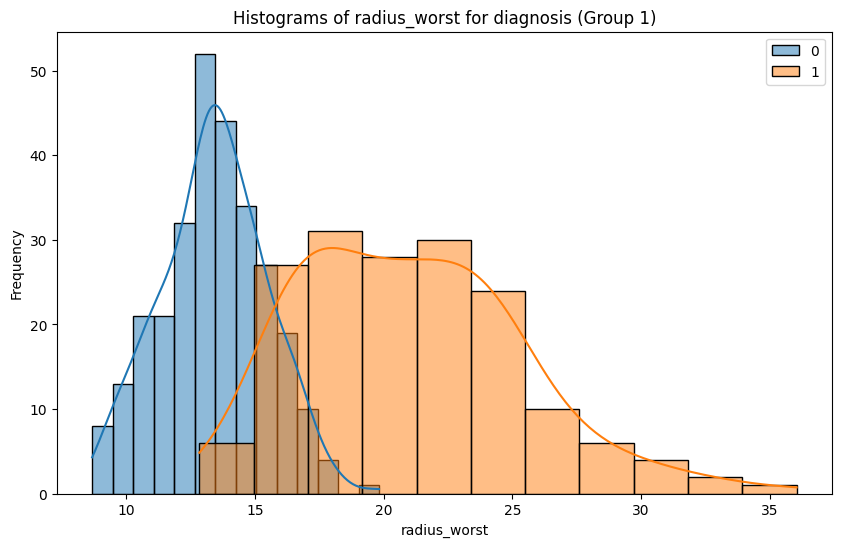

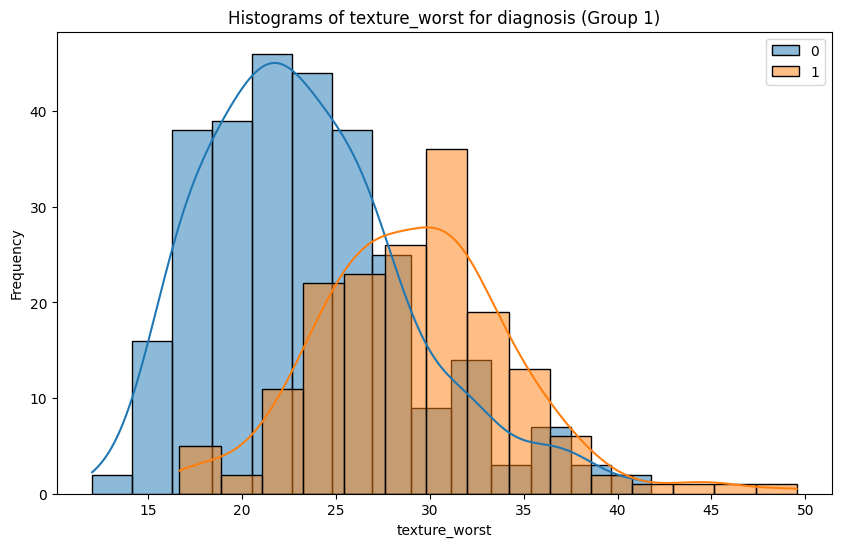

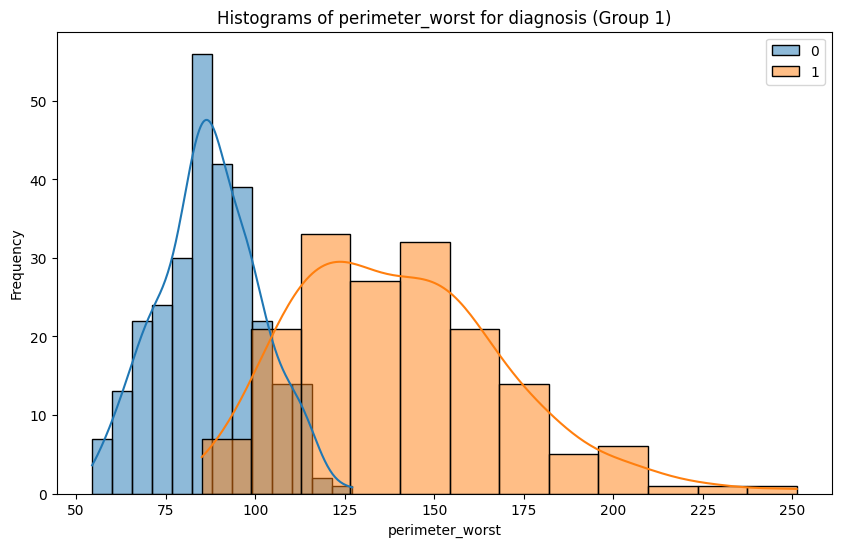

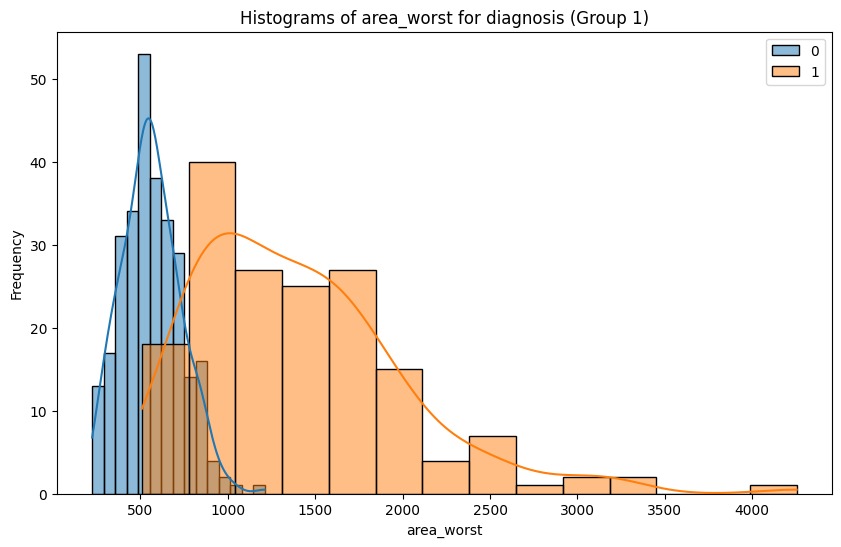

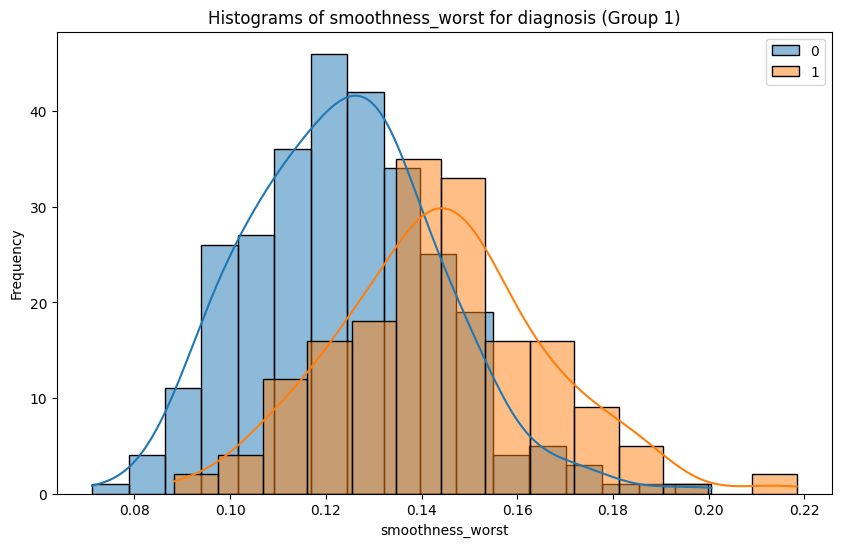

In [10]:
for col in X_train:
    bvt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

In [11]:
features1 = ["radius_mean", "perimeter_mean", "area_mean", "concavity_mean", "concave points_mean", "radius_se", "area_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst"]
features2 = ["texture_mean", "smoothness_mean", "compactness_mean", "symmetry_se", "fractal_dimension_mean", "perimeter_se", "compactness_se", "concavity_se", "concave points_se", "fractal_dimension_se"]

In [12]:
# Matriz de correlaci√≥n entre las todas las features y el target
abs(X_train.corrwith(y_train, numeric_only=True)).sort_values(ascending=False)

concave points_mean       0.778115
perimeter_worst           0.774998
radius_worst              0.766527
perimeter_mean            0.731859
area_worst                0.722875
radius_mean               0.718073
area_mean                 0.695171
concavity_mean            0.683262
compactness_mean          0.590554
radius_se                 0.540126
perimeter_se              0.529211
area_se                   0.517064
texture_worst             0.467479
smoothness_worst          0.430364
texture_mean              0.416213
concave points_se         0.380240
smoothness_mean           0.375137
symmetry_mean             0.348123
compactness_se            0.254370
concavity_se              0.216047
smoothness_se             0.058123
fractal_dimension_se      0.041727
fractal_dimension_mean    0.014308
symmetry_se               0.004723
texture_se                0.003226
dtype: float64

In [13]:
# Calcular la matriz de correlaci√≥n entre las features
feature_corr = X_train.corr()

# Filtrar las correlaciones absolutas entre 0.8 y 1 o entre -0.8 y -1
selected_features = feature_corr[
    (feature_corr.abs() >= 0.8) & (feature_corr.abs() <= 1)
].stack().reset_index()

# Renombrar columnas para claridad
selected_features.columns = ['Feature1', 'Feature2', 'Correlation']

# Eliminar duplicados y valores de la diagonal principal (correlaci√≥n con s√≠ misma)
selected_features = selected_features[
    (selected_features['Feature1'] != selected_features['Feature2'])
].drop_duplicates(subset=['Correlation'])

# Mostrar las correlaciones seleccionadas
selected_features

Feature1              Feature2  Correlation
1           radius_mean        perimeter_mean     0.997850
2           radius_mean             area_mean     0.986609
3           radius_mean   concave points_mean     0.812377
4           radius_mean          radius_worst     0.969134
5           radius_mean       perimeter_worst     0.963536
6           radius_mean            area_worst     0.941849
8          texture_mean         texture_worst     0.909718
11       perimeter_mean             area_mean     0.985985
12       perimeter_mean   concave points_mean     0.842081
13       perimeter_mean          radius_worst     0.969620
14       perimeter_mean       perimeter_worst     0.969674
15       perimeter_mean            area_worst     0.943283
19            area_mean   concave points_mean     0.814273
20            area_mean          radius_worst     0.960519
21            area_mean       perimeter_worst     0.955701
22            area_mean            area_worst     0.959723
24      smoothness_mean      smoothness_worst     0.808290
26     compactness_mean        concavity_mean     0.877467
27     compactness_mean   concave points_mean     0.825932
30       concavity_mean   concave points_mean     0.914671
37  concave points_mean          radius_worst     0.827695
38  concave points_mean       perimeter_worst     0.855666
39  concave points_mean            area_worst     0.811102
43            radius_se          perimeter_se     0.973560
44            radius_se               area_se     0.951025
48         perimeter_se               area_se     0.937271
54       compactness_se          concavity_se     0.802761
55       compactness_se  fractal_dimension_se     0.800397
67         radius_worst       perimeter_worst     0.993315
68         radius_worst            area_worst     0.983458
77      perimeter_worst            area_worst     0.976979

### Ejercicio 6: MiniEDA (III)

Crea una variable de tipo lista a la que asignes los valores de las columnas que creas conveniente emplear como features en funci√≥n de lo visto en el miniEDA. Haz una lista de modelos/algoritmos que vas a emplear para hacer el modelo (solo los nombres). En funci√≥n de la lista anterior, ¬øtienes que tratar las variables, por qu√©?

In [14]:
features1 = ["radius_mean", "perimeter_mean", "area_mean", "concavity_mean", "concave points_mean", "radius_se", "area_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst"]
features2 = ["texture_mean", "smoothness_mean", "compactness_mean", "symmetry_se", "fractal_dimension_mean", "perimeter_se", "compactness_se", "concavity_se", "concave points_se", "fractal_dimension_se"]
features = features1 + features2

### Ejercicio 7: Tratamiento de features

Trata las features de manera que puedan ser empleadas por los modelos que escogite en el ejercicio anterior. Recuerda que este es un paso necesario porque los modelos no entienden de primeras de "letras" (salvo alguno que no es que entienda sino que hace sus transformaciones por dentro) y porque en determinados algoritmos es necesario que los rangos de las features est√©n escalados para que el algoritmo no se decante (√©rroneamente) por alguna feature s√≥lo porque sus valores son mayores en rango que el de otras. NOTA: Recuerda que lo que le hagas al train, se lo tienes que hacer al test

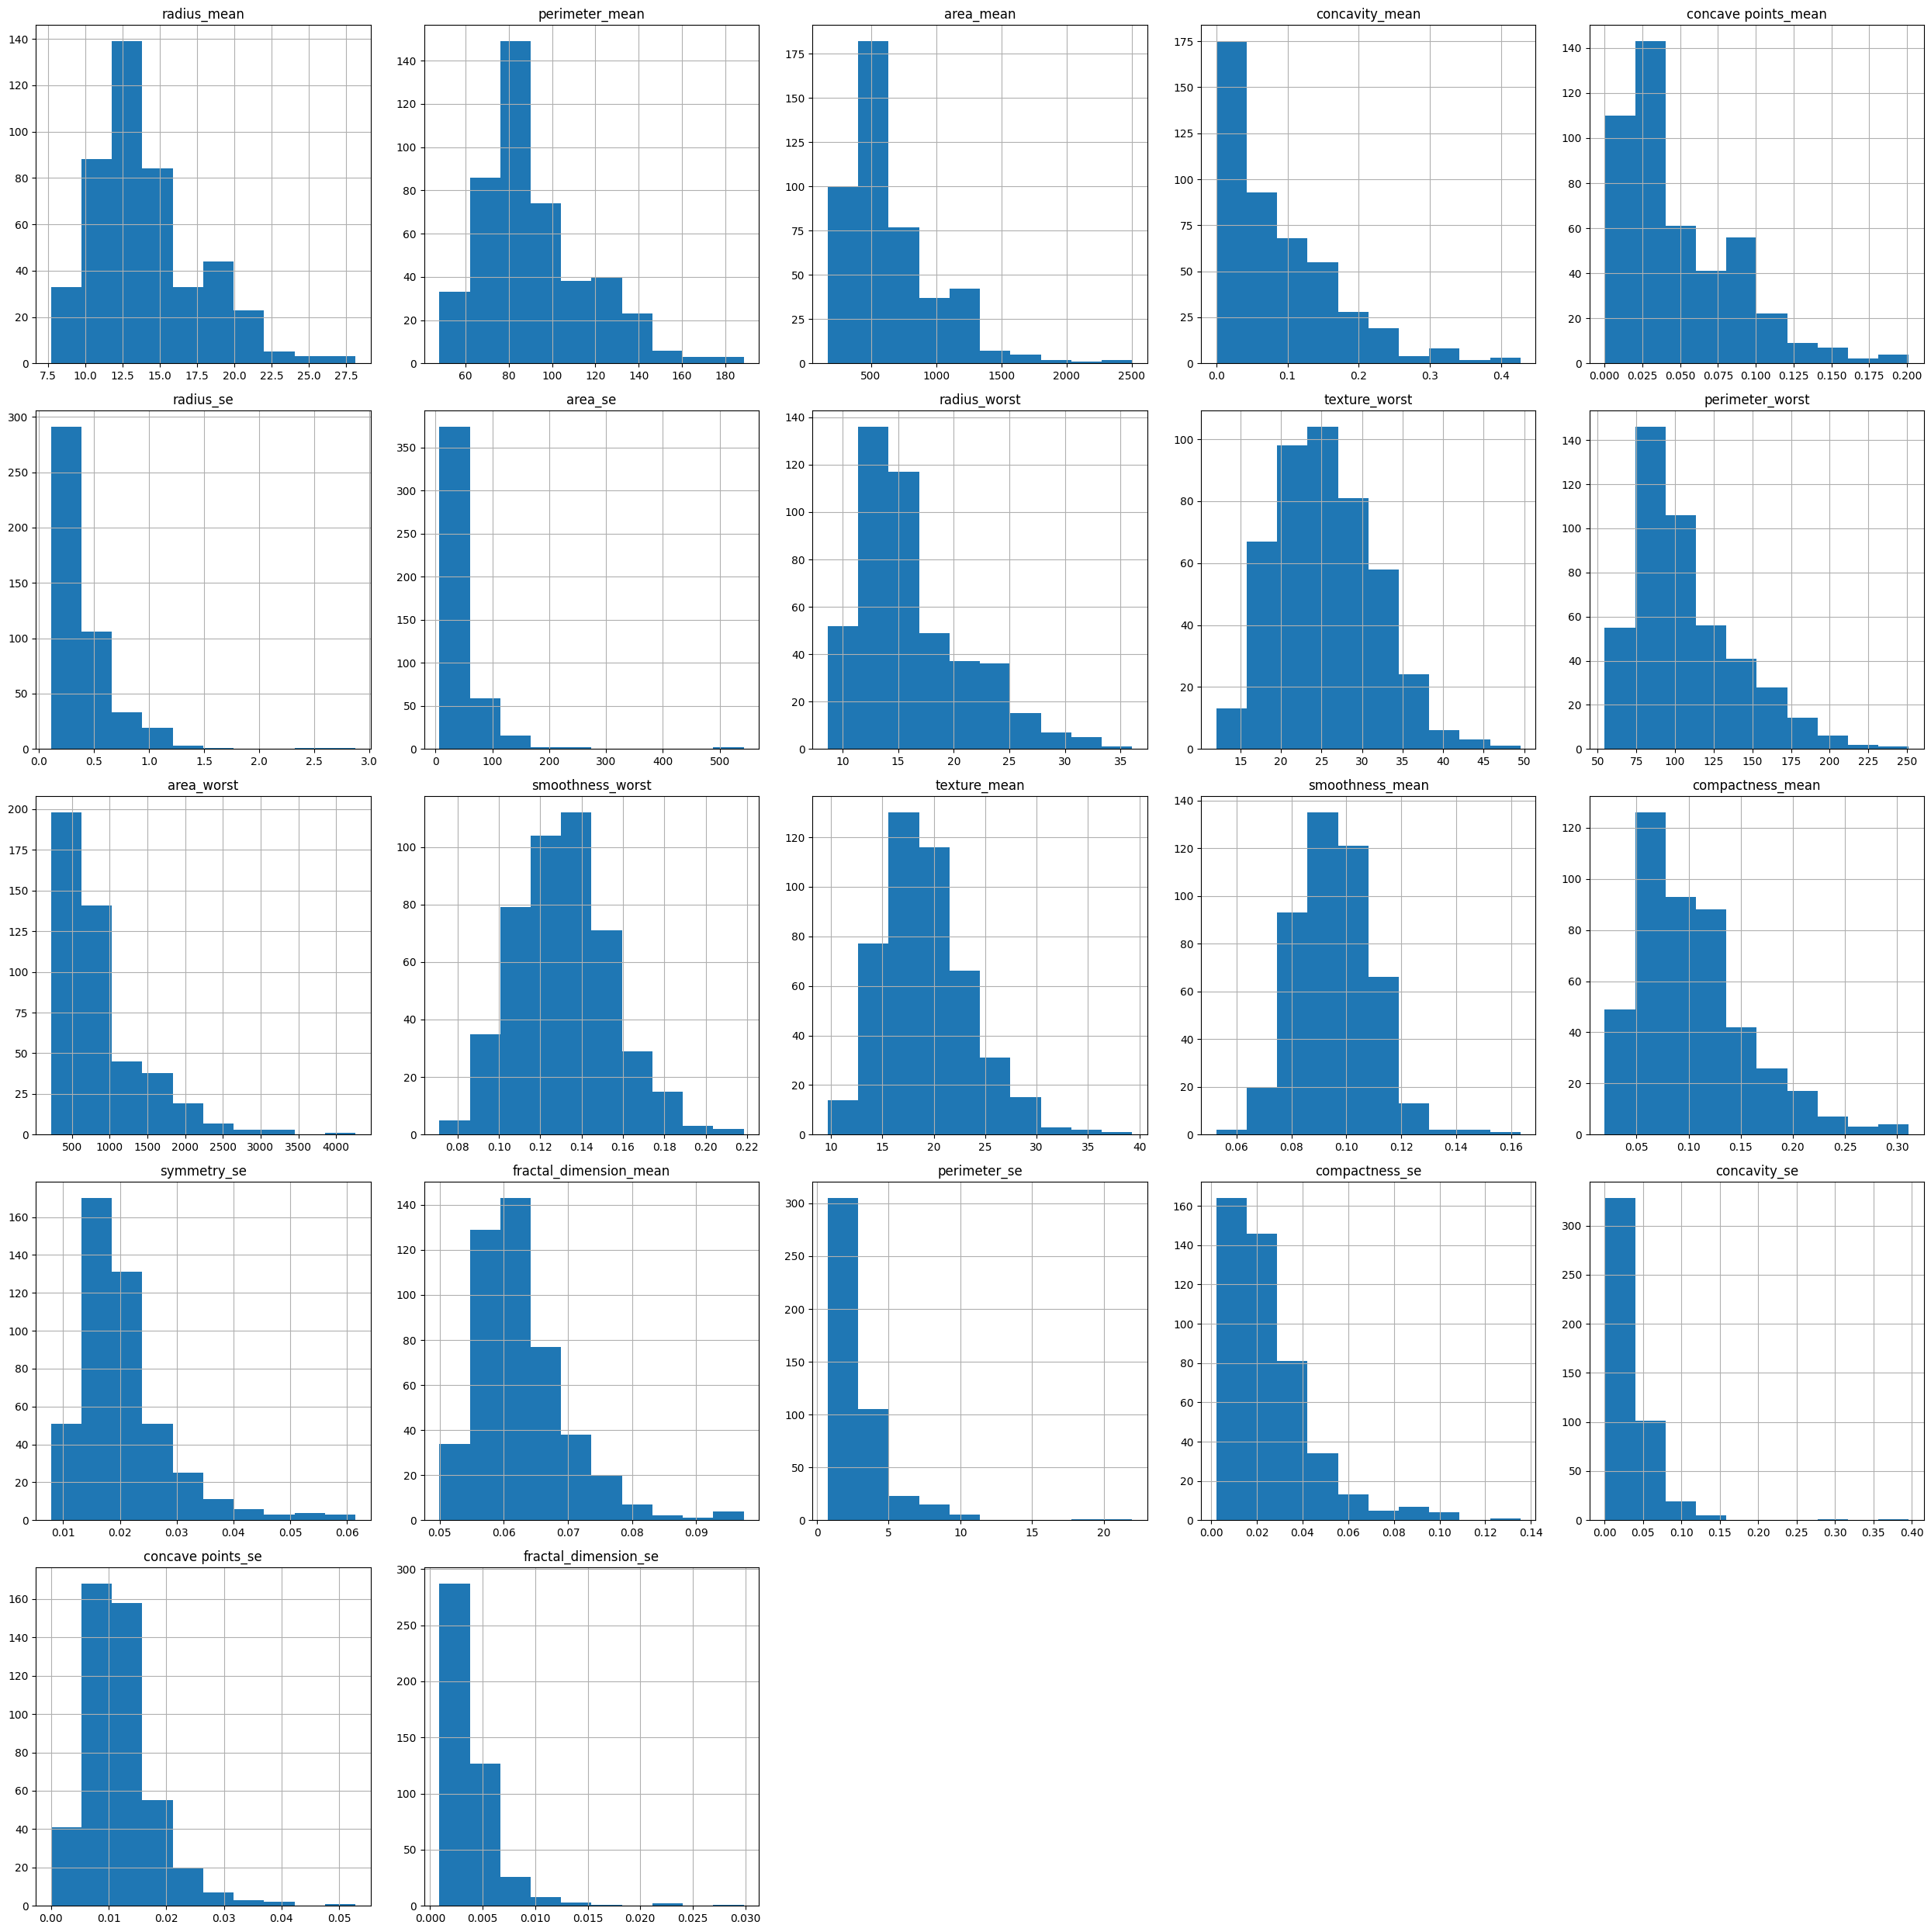

In [15]:
train_set[features].hist(figsize = (25,25))

plt.tight_layout()

In [16]:
features_log = ['area_mean',
                'compactness_mean',
                'concavity_mean',
                'concave points_mean',
                'radius_se',
                'perimeter_se',
                'area_se',
                'compactness_se',
                'concavity_se',
                'fractal_dimension_se',
                'radius_worst',
                'area_worst']

train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [17]:
# Aplicar log1p (asi nos aseguramos que no haya error con las que comiencen en 0) a las caracter√≠sticas en features_log

for feature in features_log:
    train_set_scaled[feature] = np.log1p(train_set_scaled[feature])
    test_set_scaled[feature] = np.log1p(test_set_scaled[feature])

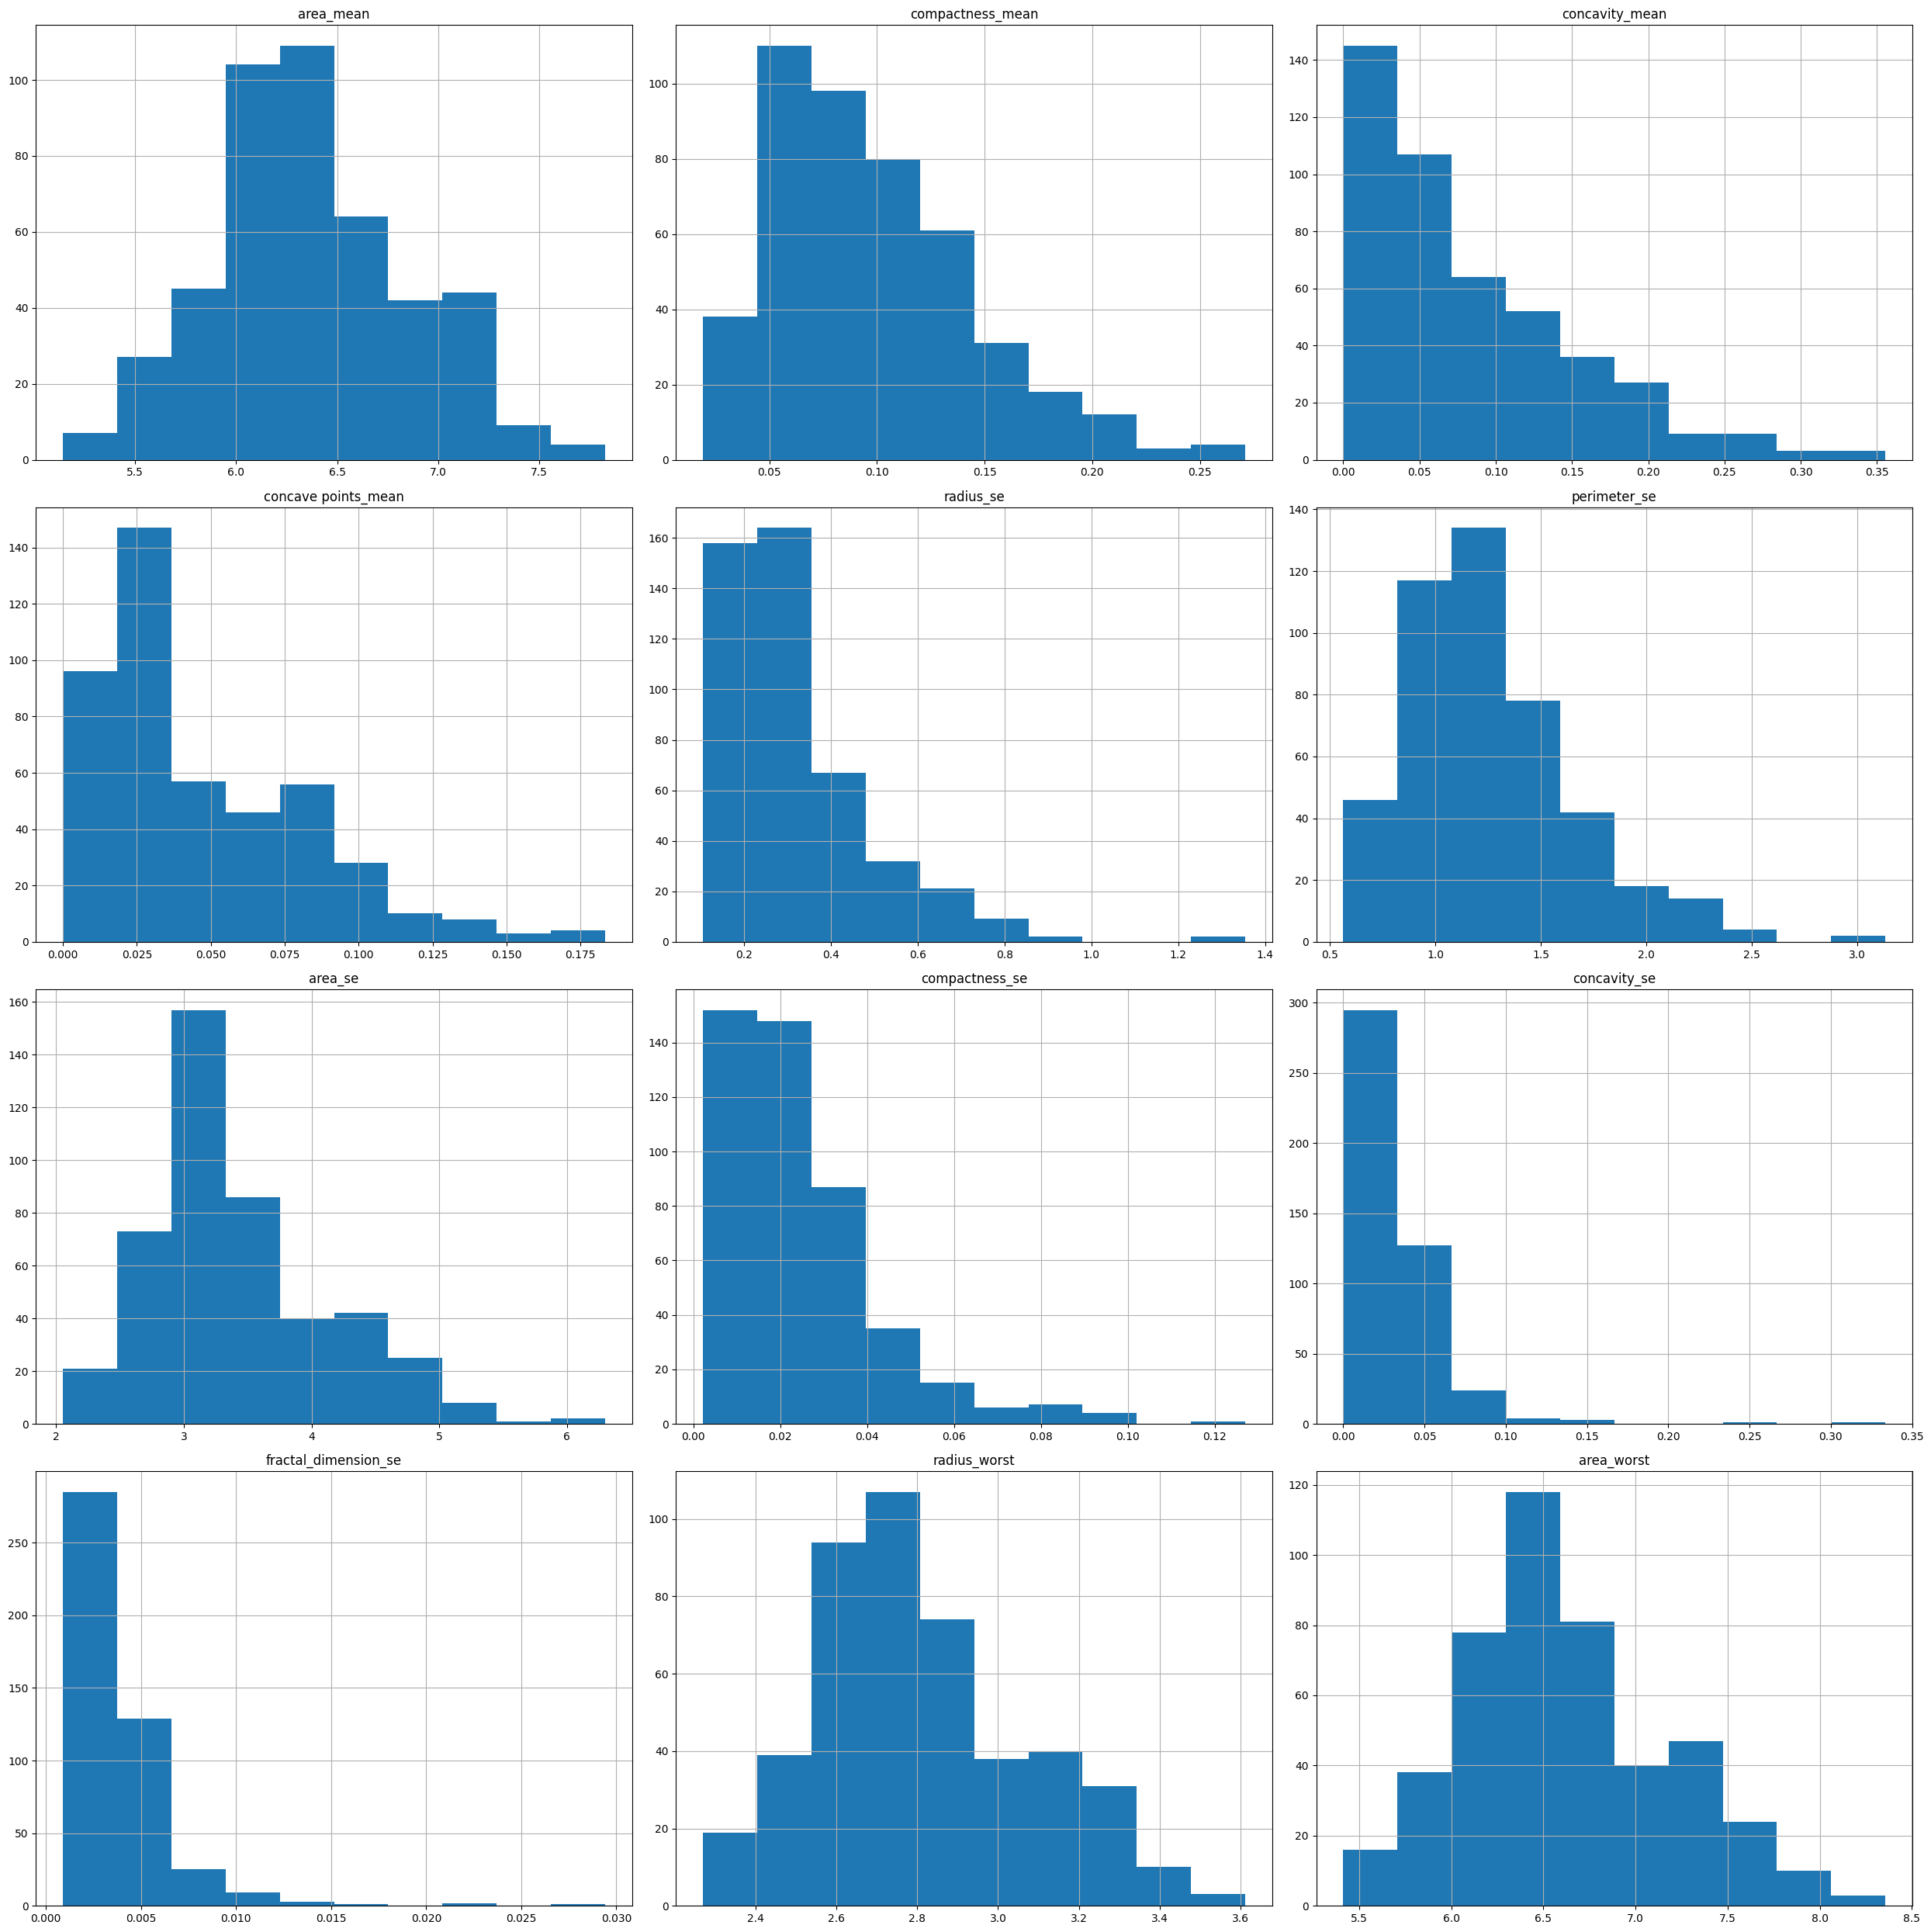

In [18]:
train_set_scaled[features_log].hist(figsize = (25,25))

plt.tight_layout()

In [19]:
scaler = StandardScaler()
train_set_scaled[features] = scaler.fit_transform(train_set_scaled[features])
test_set_scaled[features] = scaler.transform(test_set_scaled[features])

### Ejercicio 8: Creaci√≥n de los dataset de train y test

Crea las parejas X,y de train y test.

In [20]:
# Creaci√≥n de diversos X dependiendo de las features a seleccionar

# TRAIN SET
X_train_all = train_set[features] # Todas las features sin escalar train_set
X_train_scaled = train_set_scaled[features] # Todas las features escaladas train_set

X_train_1 = train_set[features1] # Selecci√≥n de las features mas importantes sin escalar train_set
X_train_scaled_1 = train_set_scaled[features1] # Selecci√≥n de las mas importantes escaladas train_set

X_train_2 = train_set[features2] # Selecci√≥n de las features que siguen en el orden de importancia sin escalar train_set
X_train_scaled_2 = train_set_scaled[features2] # Selecci√≥n de las features que siguen en el orden de importancia escaladas train_set

y_train = train_set[target] # Target

# TEST SET
X_test_all = test_set[features] # Todas las features sin escalar test_set
X_test_scaled = test_set_scaled[features] # Todas las features escaladas test_set

X_test_1 = test_set[features1] # Selecci√≥n de las features mas importantes sin escalar test_set
X_test_scaled_1 = test_set_scaled[features1] # Selecci√≥n de las mas importantes escaladas test_set

X_test_2 = test_set[features2] # Selecci√≥n de las features que siguen en el orden de importancia sin escalar test_set
X_test_scaled_2 = test_set_scaled[features2] # Selecci√≥n de las features que siguen en el orden de importancia escaladas test_set

y_test = test_set[target] # Target


### Ejercicio 9: Instanciaci√≥n de modelos

Importa e instancia los modelos que hayas escogido en el ejercicio 6. En general, no hace falta que asignes ahora ning√∫n hiperpar√°metro salvo en los basados en √°rboles en los que debes escoger un max_depth para evitar el sobreajuste inicial. Si quieres emplear la regresi√≥n log√≠stica es posible que tengas que utilizar un valor de max_iter para que el algoritmo converja.

In [21]:
lr_clf = LogisticRegression(max_iter = 5000)
rf_clf = RandomForestClassifier(max_depth= 5)
lgb_clf = LGBMClassifier(max_depth= 5, verbose = -100)
xgb_clf = XGBClassifier(max_depth = 5)

modelos = {"Regresion Logistica": lr_clf,
           "Random Forest": rf_clf,
           "Lightgbm": lgb_clf,
           "XGBoost": xgb_clf}

### Ejercicio 10: Comparativa de modelos

Haz la comparativa de modelos empleando cross_val_score (es decir la validaci√≥n cruzada). Utiliza k = 5, y un scoring acorde a la m√©trica escogida en el ejercicio 1. Si no tienes clara la m√©trica entonces emplea el recall_medio y usa scoring = "balanced acuracy". Escoge el modelo ganador.

In [22]:
# Definir la m√©trica de evaluaci√≥n
scoring_func = "balanced_accuracy"  # Se usa balanced accuracy

# Diccionario para almacenar los mejores resultados
resultados = {}

# Conjuntos de features (incluyendo escalado para regresi√≥n log√≠stica)
feature_sets = {
    "Todas las features": (X_train_all, X_train_scaled, X_test_all, X_test_scaled),
    "Features m√°s importantes": (X_train_1, X_train_scaled_1, X_test_1, X_test_scaled_1),
    "Segunda selecci√≥n de features": (X_train_2, X_train_scaled_2, X_test_2, X_test_scaled_2)
}

# Evaluar cada modelo con cada conjunto de features
for nombre_modelo, modelo in modelos.items():
    print(f"\nModelo: {nombre_modelo}")
    mejores_resultados = {}

    for nombre_feat, (X_train, X_train_scaled, X_test, X_test_scaled) in feature_sets.items():
        # Usar el conjunto escalado solo en la regresi√≥n log√≠stica
        if nombre_modelo == "Regresion Logistica":
            X_train_usar = X_train_scaled
            X_test_usar = X_test_scaled
        else:
            X_train_usar = X_train
            X_test_usar = X_test

        # Validaci√≥n cruzada con 5 folds
        scores = cross_val_score(modelo, X_train_usar, y_train, cv=5, scoring=scoring_func)
        recall_medio = np.mean(scores)

        mejores_resultados[nombre_feat] = recall_medio
        print(f"  {nombre_feat}: Recall Medio = {recall_medio:.4f}")

    # Guardamos el mejor resultado del modelo
    mejor_feature_set = max(mejores_resultados, key=mejores_resultados.get)
    resultados[nombre_modelo] = (mejor_feature_set, mejores_resultados[mejor_feature_set])

# Mostrar el mejor resultado por modelo
print("\nüèÜ Mejor score (balanced accuracy) por modelo:")
for modelo, (feat_set, score) in resultados.items():
    print(f"{modelo}: {feat_set} con {score:.4f}")




Modelo: Regresion Logistica
  Todas las features: Recall Medio = 0.9606
  Features m√°s importantes: Recall Medio = 0.9601
  Segunda selecci√≥n de features: Recall Medio = 0.8938

Modelo: Random Forest
  Todas las features: Recall Medio = 0.9502
  Features m√°s importantes: Recall Medio = 0.9506
  Segunda selecci√≥n de features: Recall Medio = 0.8851

Modelo: Lightgbm
  Todas las features: Recall Medio = 0.9601
  Features m√°s importantes: Recall Medio = 0.9536
  Segunda selecci√≥n de features: Recall Medio = 0.9045

Modelo: XGBoost
  Todas las features: Recall Medio = 0.9601
  Features m√°s importantes: Recall Medio = 0.9584
  Segunda selecci√≥n de features: Recall Medio = 0.9012

üèÜ Mejor score (balanced accuracy) por modelo:
Regresion Logistica: Todas las features con 0.9606
Random Forest: Features m√°s importantes con 0.9506
Lightgbm: Todas las features con 0.9601
XGBoost: Todas las features con 0.9601


### Ejercicio 11: Ajuste de hiperpar√°metros

Escoge un grid para ajustar los hiperpar√°metros de tu modelo. Crea un objeto GridSearch y "ajustalo" (emplea su m√©todo fit) para encontrar la mejor combinaci√≥nde hiperpar√°metros empleando la m√©trica que decidimos en el ejercio 1. Si no lo tienes claro emplea "balance accuracy". Por otro lado, incluye en el grid, el hiperpar√°metro que permita que el modelo "compense" el desbalanceo del dataset de entrada, aunque este no lo tenga.

In [23]:
# Definir la m√©trica de evaluaci√≥n
scoring_func = "balanced_accuracy"  # Se usa balanced accuracy

# Diccionario para almacenar los mejores resultados
resultados = {}

# Hiperpar√°metros para cada modelo
param_grid = {
    "Regresion Logistica": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"],
        "class_weight": ["balanced", None]  # Se agrega class_weight=balanced
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10, None],
        "class_weight": ["balanced", None]  # Se agrega class_weight=balanced
    },
    "Lightgbm": {
        "num_leaves": [10, 20, 30],
        "learning_rate": [0.01, 0.1, 0.2],
        "n_estimators": [50, 100, 200],
        "scale_pos_weight": [1, 2, 5]  # Escala de ponderaci√≥n para tratar el desbalanceo
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "n_estimators": [50, 100, 200],
        "scale_pos_weight": [1, 2, 5]  # Escala de ponderaci√≥n para tratar el desbalanceo
    }
}

# Conjuntos de features (incluyendo escalado para regresi√≥n log√≠stica)
feature_sets = {
    "Todas las features": (X_train_all, X_train_scaled, X_test_all, X_test_scaled),
    "Features m√°s importantes": (X_train_1, X_train_scaled_1, X_test_1, X_test_scaled_1),
    "Segunda selecci√≥n de features": (X_train_2, X_train_scaled_2, X_test_2, X_test_scaled_2)
}

# Evaluar cada modelo con cada conjunto de features
for nombre_modelo, modelo in modelos.items():
    print(f"\nüîç Ajustando modelo: {nombre_modelo}")
    mejores_resultados = {}

    for nombre_feat, (X_train, X_train_scaled, X_test, X_test_scaled) in feature_sets.items():
        # Usar el conjunto escalado solo en la regresi√≥n log√≠stica
        if nombre_modelo == "Regresion Logistica":
            X_train_usar = X_train_scaled
            X_test_usar = X_test_scaled
        else:
            X_train_usar = X_train
            X_test_usar = X_test

        # GridSearchCV para encontrar los mejores hiperpar√°metros
        grid_search = GridSearchCV(
            modelo,
            param_grid[nombre_modelo],
            cv=5,
            scoring=scoring_func,
            n_jobs=-1
        )

        grid_search.fit(X_train_usar, y_train)
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_

        mejores_resultados[nombre_feat] = (best_score, best_params)
        print(f"  {nombre_feat}: Mejor Recall Medio = {best_score:.4f}, Hiperpar√°metros = {best_params}")

    # Guardamos el mejor resultado del modelo
    mejor_feature_set = max(mejores_resultados, key=lambda k: mejores_resultados[k][0])
    resultados[nombre_modelo] = (mejor_feature_set, *mejores_resultados[mejor_feature_set])

# Mostrar el mejor resultado por modelo
print("\nüèÜ Mejor configuraci√≥n por modelo:")
for modelo, (feat_set, score, params) in resultados.items():
    print(f"{modelo}: {feat_set} con {score:.4f}, Hiperpar√°metros √≥ptimos: {params}")



üîç Ajustando modelo: Regresion Logistica
  Todas las features: Mejor Recall Medio = 0.9082, Hiperpar√°metros = {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'}
  Features m√°s importantes: Mejor Recall Medio = 0.9655, Hiperpar√°metros = {'C': 10, 'class_weight': 'balanced', 'solver': 'liblinear'}
  Segunda selecci√≥n de features: Mejor Recall Medio = 0.9082, Hiperpar√°metros = {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'}

üîç Ajustando modelo: Random Forest
  Todas las features: Mejor Recall Medio = 0.9613, Hiperpar√°metros = {'class_weight': None, 'max_depth': 10, 'n_estimators': 50}
  Features m√°s importantes: Mejor Recall Medio = 0.9599, Hiperpar√°metros = {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 200}
  Segunda selecci√≥n de features: Mejor Recall Medio = 0.8981, Hiperpar√°metros = {'class_weight': None, 'max_depth': None, 'n_estimators': 200}

üîç Ajustando modelo: Lightgbm
  Todas las features: Mejor Recall Medio = 0.9677, Hip

### Ejercicio 12: Evaluaci√≥n del modelo

Eval√∫a el modelo contra el dataset de test. Muestra el informe de clasificaci√≥n y haz una valoraci√≥n de si el hospital aceptar√≠a el modelo o no.


üìù Informe de clasificaci√≥n del modelo en el conjunto de test:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy del modelo en el conjunto de prueba: 0.9737


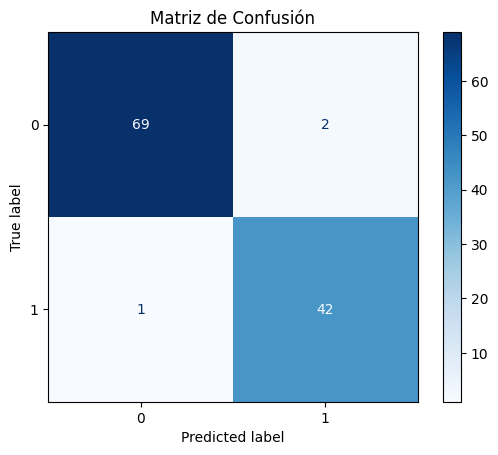

In [37]:
# Elegimos el mejor modelo y su conjunto de caracter√≠sticas
mejor_modelo_nombre = "Regresion Logistica"  # Aseg√∫rate de que sea el modelo con mejor rendimiento seg√∫n los resultados previos
mejor_feature_set = resultados[mejor_modelo_nombre][0]
best_params = resultados[mejor_modelo_nombre][1]

# Seleccionar las caracter√≠sticas del mejor conjunto de datos (seg√∫n los resultados anteriores)
if mejor_feature_set == "Todas las features":
    X_test_usar = X_test_scaled
elif mejor_feature_set == "Features m√°s importantes":
    X_test_usar = X_test_scaled_1
else:
    X_test_usar = X_test_scaled_2

# Ajustamos el modelo con los mejores hiperpar√°metros
modelo_final = GridSearchCV(modelos[mejor_modelo_nombre], 
                            param_grid[mejor_modelo_nombre], 
                            cv=5, 
                            scoring="balanced_accuracy", 
                            n_jobs=-1)

modelo_final.fit(X_train_usar, y_train)

# Realizamos la predicci√≥n sobre el conjunto de test
y_pred = modelo_final.predict(X_test_usar)

# Evaluaci√≥n del rendimiento del modelo
print("\nüìù Informe de clasificaci√≥n del modelo en el conjunto de test:")
print(classification_report(y_test, y_pred))

# Obtener la precisi√≥n general
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")

# Matriz de Confusi√≥n con ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Visualizar la Matriz de Confusi√≥n utilizando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_final.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusi√≥n')
plt.show()

### Ejercicio 13: An√°lisis de errores

Muestra la matriz de confusi√≥n con los porcentajes de precisi√≥n (emplea ConfusionMatrixDisplay.from_predictions con el argumento normalize con el valor adecuado). Haz un peque√±o an√°lisis.

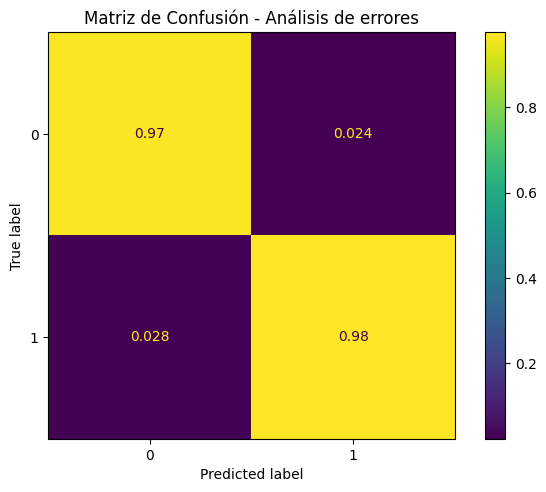

In [25]:
# Mostrar la matriz de confusi√≥n con valores flotantes
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="pred")
plt.tight_layout()
plt.title('Matriz de Confusi√≥n - An√°lisis de errores')
plt.show()

### EXTRA: 

Busca en Internet o preg√∫ntale a tu AI preferida, c√≥mo se graba un modelo en disco y g√∫ardalo en "./models/cancer_pred" con la extesi√≥n apropiada.